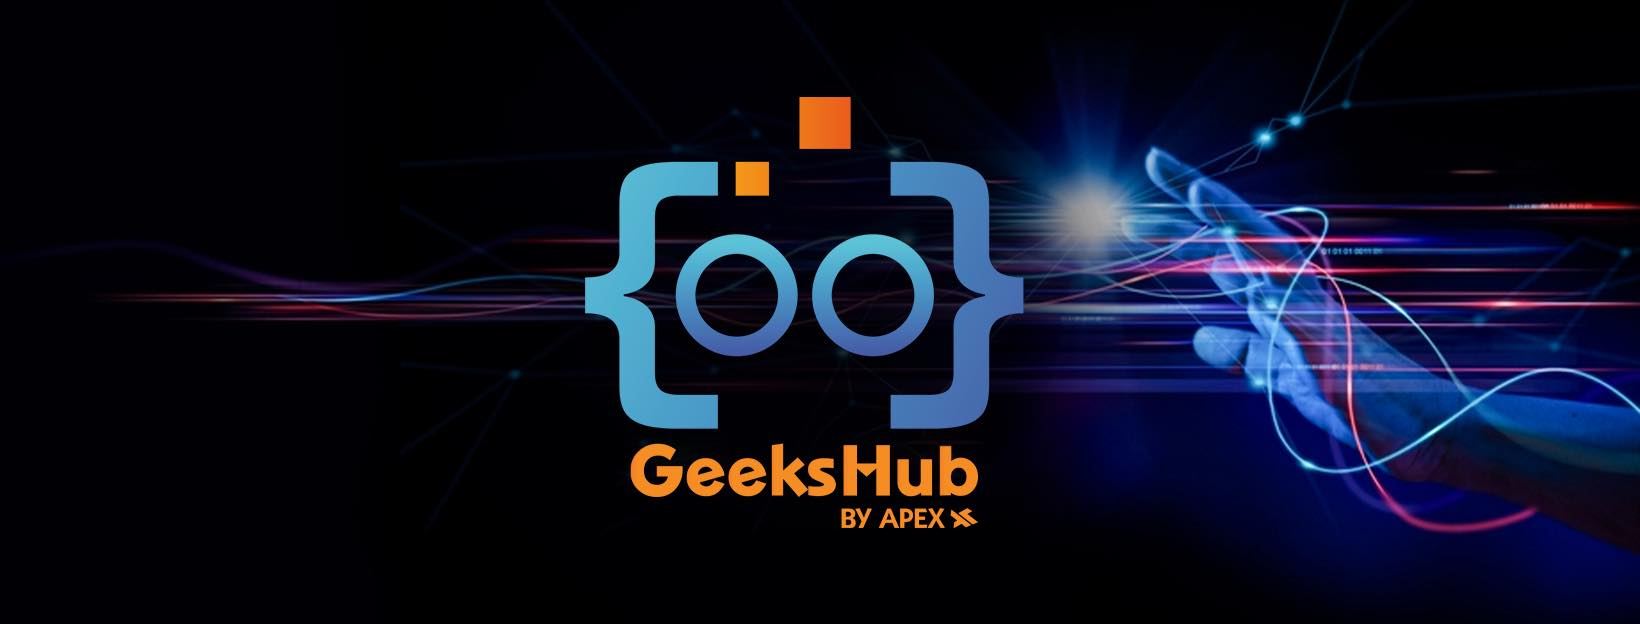

# DS Workshop Day 2 : Building our ML model 


## Welcome to this data science workshop by [GeeksHub](https://www.facebook.com/GeeksHUB.eg) !!! 
(check out our page for more details)  &#128064;



### Our problem : predicting the rating of apps from the [Google Play Store Apps Dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps/code?datasetId=49864&language=Python&outputs=Visualization&tagIds=13201%2C16614)

### Day 1️⃣: Tips and Tricks for Data Preparation and Exploratory Data Analysis (1.5 – 2 hours)

* Set the stage for an exciting data science journey.

* Advanced Data Cleaning with Pandas.

* Techniques for handling missing data.

* Removing outliers and anomalies.

* Exploratory Data Analysis (EDA) with Matplotlib.

* Advanced plotting and visualization.

* Extracting insights from data.

### Day 2️⃣: Machine Learning Review (2 hours)

* Model training and selection.

* Understanding model evaluation and performance metrics.

* Selecting the best algorithm for a task.

* Extra: Hyperparameter Tuning.

* Extra: Optimizing model performance.

* Practical: Apply these Conceptston your Selected Dataset (1.5 hours)


### Day 3️⃣: Finalize our Project. Open discussion about the most common Technical Issues.

Our instructors will guide you through each topic, and you'll have the opportunity to apply your learning to real-world datasets, gaining valuable practical experience.




*This workshop is reviewed and supervised by Eng. Ahmed Abdelmalek – Senior NLP Engineer @WideBot - [Linkedin](https://www.linkedin.com/in/ahmed-abdelmalek/)*

*And taught by:*

*Mustafa Osama, NLP engineer @Widebot - [Linkedin](https://www.linkedin.com/in/mustafa-osama-164254232/)*

*Abdelrahman Mohamed, Clinical data analyst and Co-founder of GeeksHub- [Linkedin](https://www.linkedin.com/in/abdelrahman-mohamed-%F0%9F%87%B5%F0%9F%87%B8-210ab81b7/)*


# Day 2 : Machine Learning Review

![meme1](meme2.png)



**Remember to check the description of the dataset from the link provided to better understand the data we will be working on but accounting for the lazy ones here's a quick description of the dataset**  &#128064; 



*The dataset is produced by scraping of the google app store containing the following information about each app:*
    
   * App (name)
   * Category 
   * Rating
   * Reviews
   * Size
   * Installs (number of installation)
   * Type (free or paid)
   * Price
   * Content Rating (appropriate for which age group)
   * Genres (more than one genre can co-exist in one game)
   
   
   

### What will we do day 2 in a nutshell:
1. Final preprocessing steps to data  
2. Setting up our pipeline and building baseline models
4. Optimising the performance of our models

**The notebook will alternate from common-knowledge techniques and advanced methods as well as practice to be done by the students themselves**

In [44]:
### imports 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,train_test_split
from xgboost import XGBRegressor
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from scipy import stats



In [45]:
## read the cleaned data
data=pd.read_csv("data_cleaned.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year,Last Updated Season
0,Photo Editor & Candy Camera & Grid & ScrapBook,OTHER,4.1,159.0,19.0,10000,Free,0.0,Everyone 10+,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,winter
1,Coloring book moana,OTHER,3.9,967.0,14.0,500000,Free,0.0,Everyone 10+,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,winter
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",OTHER,4.7,87510.0,8.7,5000000,Free,0.0,Everyone 10+,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,winter
3,Sketch - Draw & Paint,OTHER,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,winter
4,Pixel Draw - Number Art Coloring Book,OTHER,4.3,967.0,2.8,100000,Free,0.0,Everyone 10+,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8887,FR Calculator,FAMILY,4.0,7.0,2.6,500,Free,0.0,Everyone 10+,Education,2017-06-18,1.0.0,4.1 and up,2017,winter
8888,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000,Free,0.0,Everyone 10+,Education,2017-07-25,1.48,4.1 and up,2017,winter
8889,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100,Free,0.0,Everyone 10+,Education,2018-07-06,1.0,4.1 and up,2018,winter
8890,The SCP Foundation DB fr nn5n,OTHER,4.5,114.0,-1.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,2015,winter


## 1. Final Preprocessing Steps 

<Axes: >

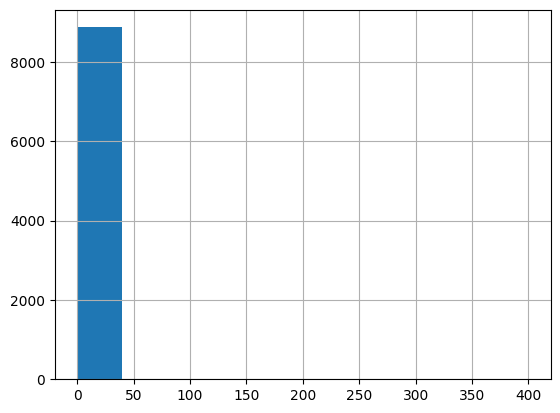

In [46]:
data["Price"].hist()

In [47]:
## let us first remove columns that we will probably not use in training 
data.drop(["App","Genres","Current Ver","Android Ver","Last Updated","Price"],axis=1,inplace=True)
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Last Updated Year,Last Updated Season
0,OTHER,4.1,159.0,19.0,10000,Free,Everyone 10+,2018,winter
1,OTHER,3.9,967.0,14.0,500000,Free,Everyone 10+,2018,winter
2,OTHER,4.7,87510.0,8.7,5000000,Free,Everyone 10+,2018,winter
3,OTHER,4.5,215644.0,25.0,50000000,Free,Teen,2018,winter
4,OTHER,4.3,967.0,2.8,100000,Free,Everyone 10+,2018,winter


In [48]:
## defining our y and x 
x=data.loc[:,~data.columns.isin(["Rating"])]
y=data.Rating
##splitting our data 
xtrain,xval,ytrain,yval=train_test_split(x,y,test_size=0.2, random_state=42)

In [49]:
xtrain.shape,ytrain.shape,xval.shape,yval.shape

((7113, 8), (7113,), (1779, 8), (1779,))

In [50]:
xtrain.head()

,Category,Reviews,Size,Installs,Type,Content Rating,Last Updated Year,Last Updated Season
5615,MEDICAL,8347.0,2.6,500000,Free,Everyone 10+,2018,winter
2022,MEDICAL,54.0,17.0,5000,Free,Mature 17+,2018,winter
3847,PERSONALIZATION,147.0,16.0,10000,Free,Everyone 10+,2018,winter
5035,GAME,162530.0,97.0,10000000,Free,Mature 17+,2018,winter
1928,MEDICAL,104.0,38.0,1000,Paid,Teen,2018,winter


In [51]:
## what columns are categorical and what columns are numerical 
cat=x.columns[x.dtypes=="object"]
num=x.columns[x.dtypes!="object"]

In [52]:
print(f"Numerical columns are\n{num}\n\nCategorical Columns are\n{cat}")

Numerical columns are
Index(['Reviews', 'Size', 'Installs', 'Last Updated Year'], dtype='object')

Categorical Columns are
Index(['Category', 'Type', 'Content Rating', 'Last Updated Season'], dtype='object')


In [53]:
#### let us encode categorical variables 
onehot=OneHotEncoder(drop="first")
onehot.fit(xtrain[cat])

def transform_encoder(encoder,df,cat): 
        """
        transforms given dataframe using inputted fitted encoder
    Args:
        encoder (OneHotEncoder Class Object): fitted encoder
        df (dataframe): dataframe to be transformed.
        cat (list): list of categorical column names 

    Returns:
        transformed dataframe with categorical features dummy variables added 

    """
        dummy=encoder.transform(df[cat])
        col_names=encoder.get_feature_names_out(input_features=cat)
        print(dummy.shape,col_names.shape)
        dummy_df=pd.DataFrame(dummy.toarray(),columns=col_names,index=df.index)
        df.drop(cat,axis=1,inplace=True)
        df=pd.concat([df,dummy_df],axis=1)
        return df 
xtrain=transform_encoder(onehot,xtrain,cat)
xval=transform_encoder(onehot,xval,cat)





(7113, 13) (13,)
(1779, 13) (13,)


In [54]:
xtrain.head()

,Reviews,Size,Installs,Last Updated Year,Category_FAMILY,Category_FINANCE,Category_GAME,Category_LIFESTYLE,Category_MEDICAL,Category_OTHER,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_TOOLS,Type_Paid,Content Rating_Mature 17+,Content Rating_Teen
5615,8347.0,2.6,500000,2018,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022,54.0,17.0,5000,2018,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3847,147.0,16.0,10000,2018,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5035,162530.0,97.0,10000000,2018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1928,104.0,38.0,1000,2018,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [55]:
xval.head()

,Reviews,Size,Installs,Last Updated Year,Category_FAMILY,Category_FINANCE,Category_GAME,Category_LIFESTYLE,Category_MEDICAL,Category_OTHER,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_TOOLS,Type_Paid,Content Rating_Mature 17+,Content Rating_Teen
5333,8175.0,3.2,100000,2018,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3405,73404.0,5.3,1000000,2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5164,539.0,13.0,50000,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1659,3073251.0,33.0,50000000,2018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400,68057.0,85.0,10000000,2018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
## remember the missing in size column ?
## let's fix it now 
xtrain["Size"]=np.where(xtrain["Size"]== -1,np.nan,xtrain["Size"])
xval["Size"]=np.where(xval["Size"]==-1,np.nan,xval["Size"])
xtrain["Size"].isna().sum()/len(xtrain)

0.16547167158723464

more than 5% of the data is missing, we can choose to either:
* remove column as a whole (complete case analysis)
* impute missing by mean (most common practice but does not regard for reason of missingness)
* end-of-distribution imputation as we assume the variable is not missing at random as there is a reason but we do not have probability distribution for it 


In [57]:
### check Missing Values.ipynb notebook provided in Day 1 
## I will do mean imputation , feel free to try smth else 
mean_val=np.mean(xtrain["Size"])
xtrain["Size"].fillna(mean_val,inplace=True)
xval["Size"].fillna(mean_val,inplace=True)



In [58]:
## dealing with outliers 
def diagnostic_plots(df, variable):
    '''
    This function draws 3 diagnostic plots to check for outliers : a boxplot,a histogram and a Q-Q plot
    
    Args:
    df: pandas dataframe with variable of choice
    variable (string): name of numerical column to be studied 
    
    '''
    plt.figure(figsize=(16, 4))
    plt.suptitle(variable)

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(df[variable])
    plt.title('Boxplot')

    plt.show()

    
    


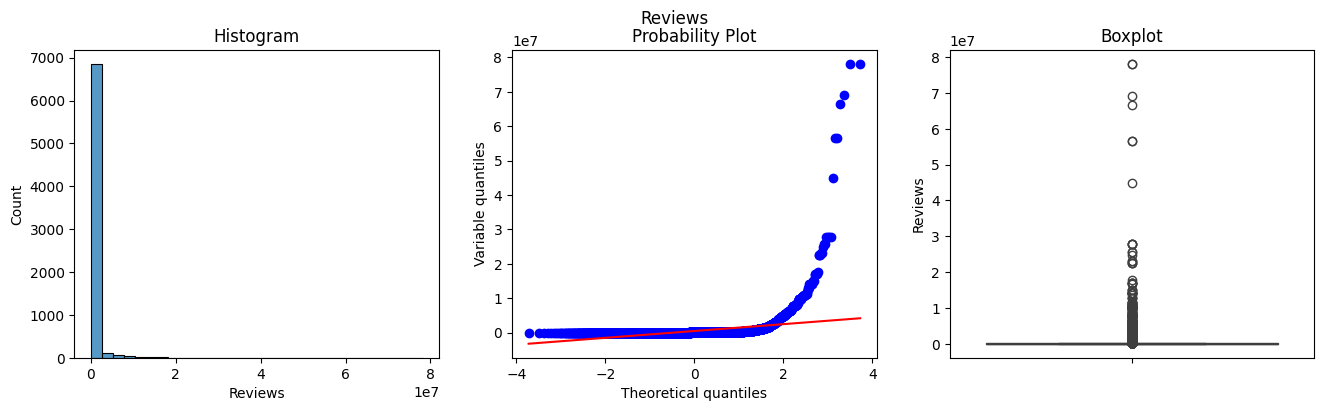

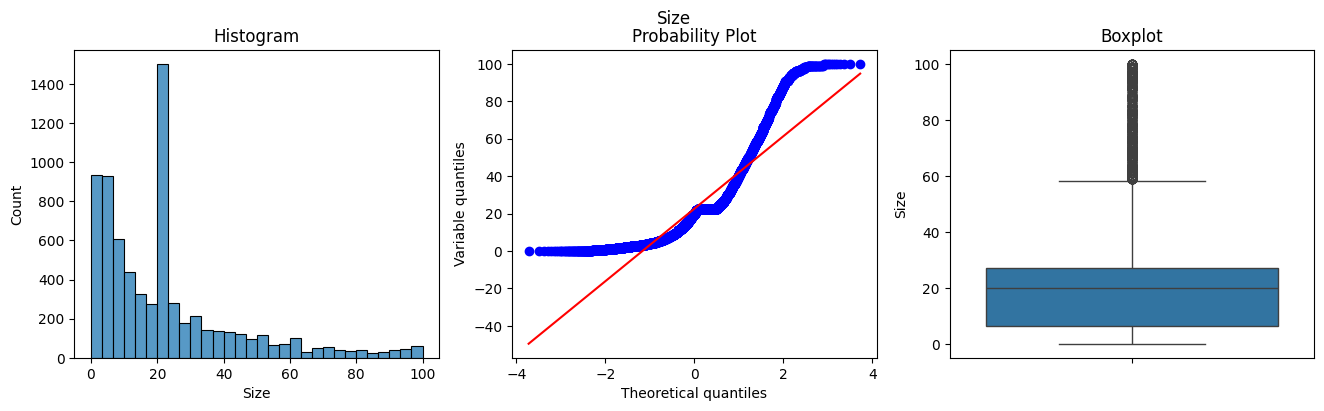

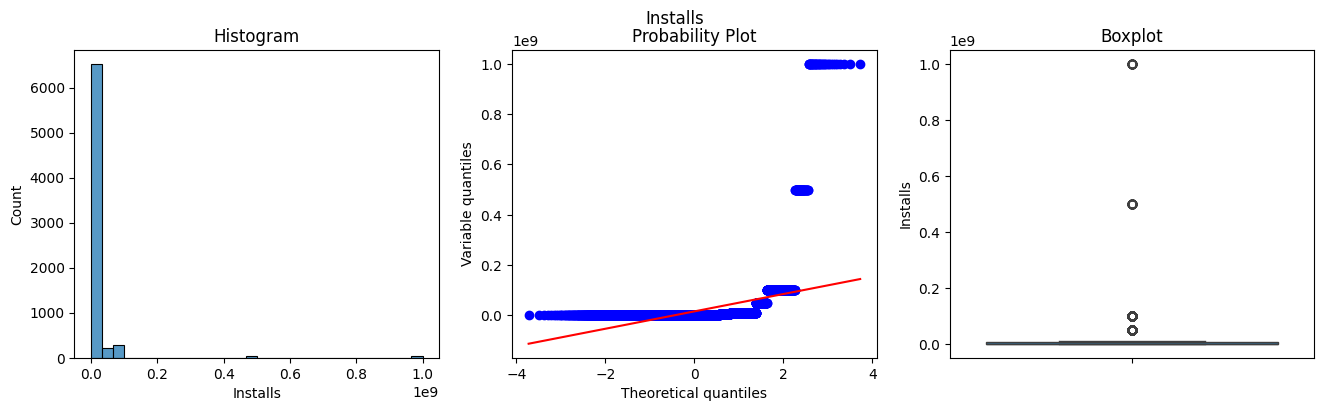

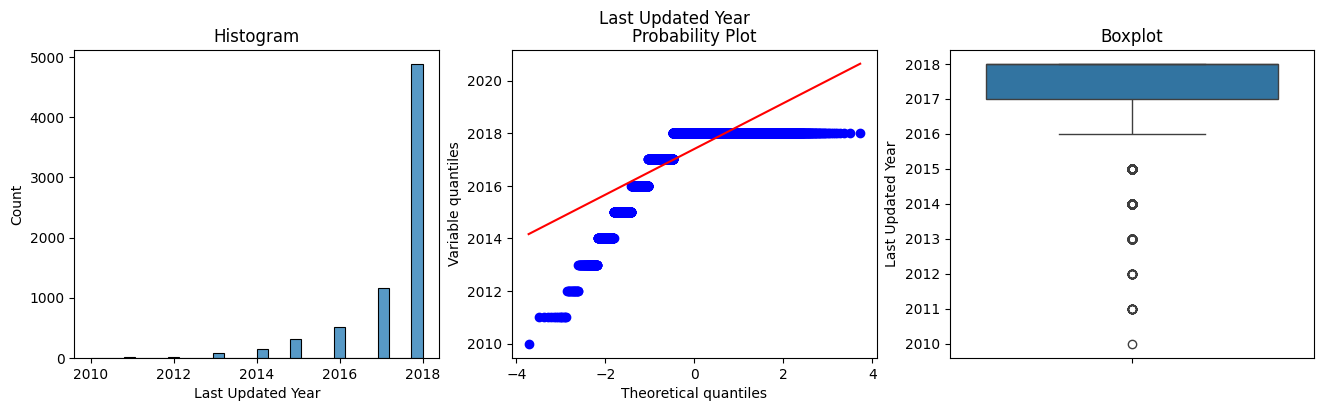

In [59]:
for col in num:
    diagnostic_plots(xtrain,col)

In [60]:
def find_boundaries(df,variable):
    iqr=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower=df[variable].quantile(0.25)-(iqr*1.5)
    upper=df[variable].quantile(0.75)+(iqr*1.5)
    return lower , upper 

def cap_outliers(df,variable,lower,upper):
    df[variable]=np.where(df[variable]>upper,upper,
                          np.where(df[variable]<lower,lower,df[variable]))

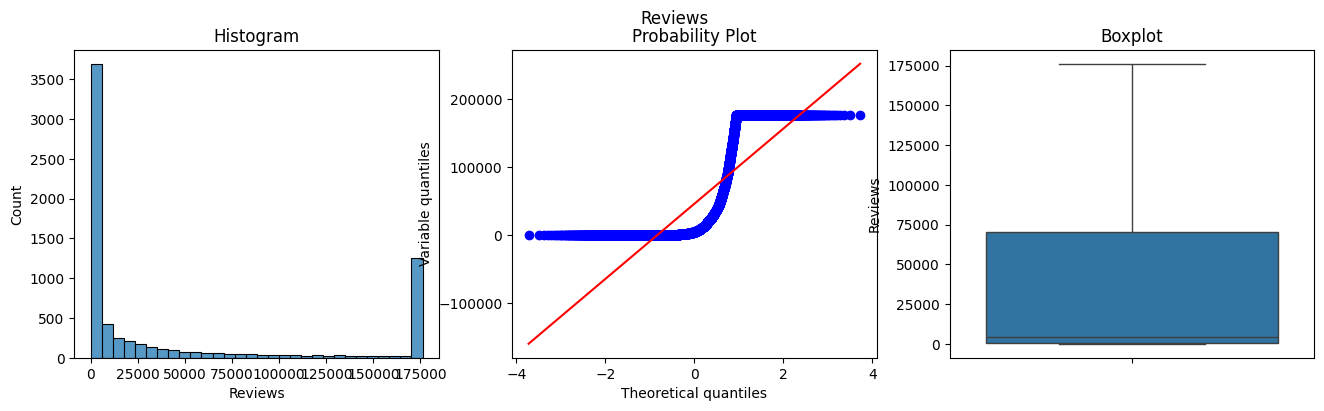

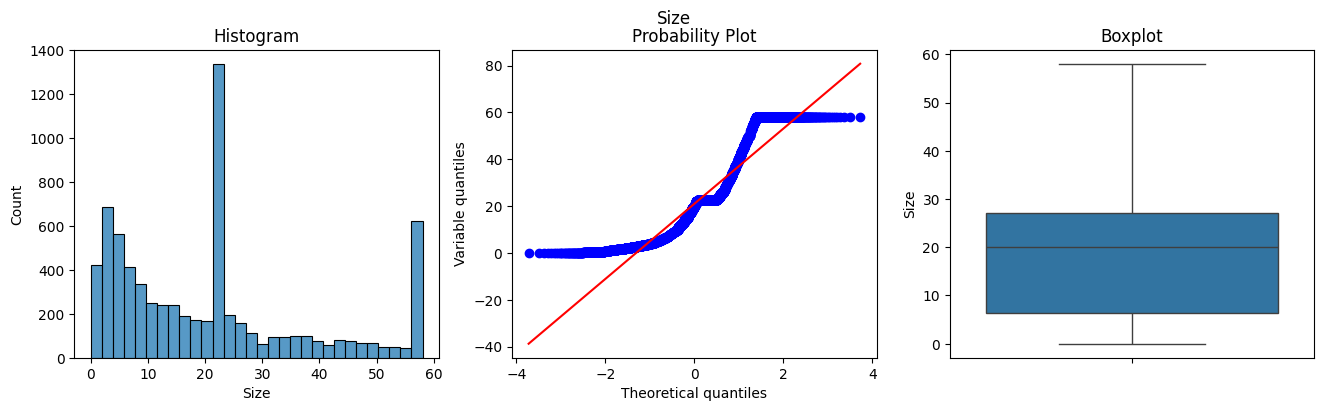

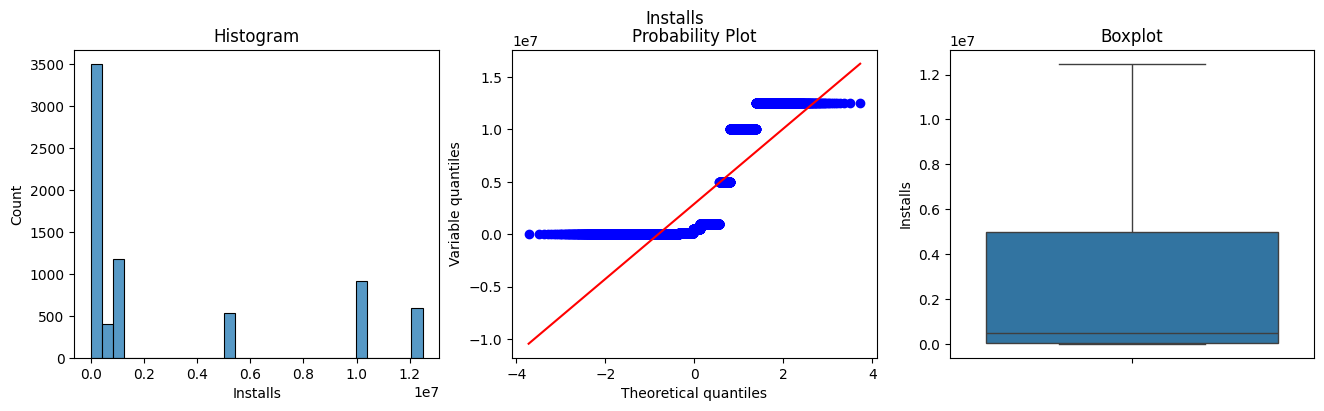

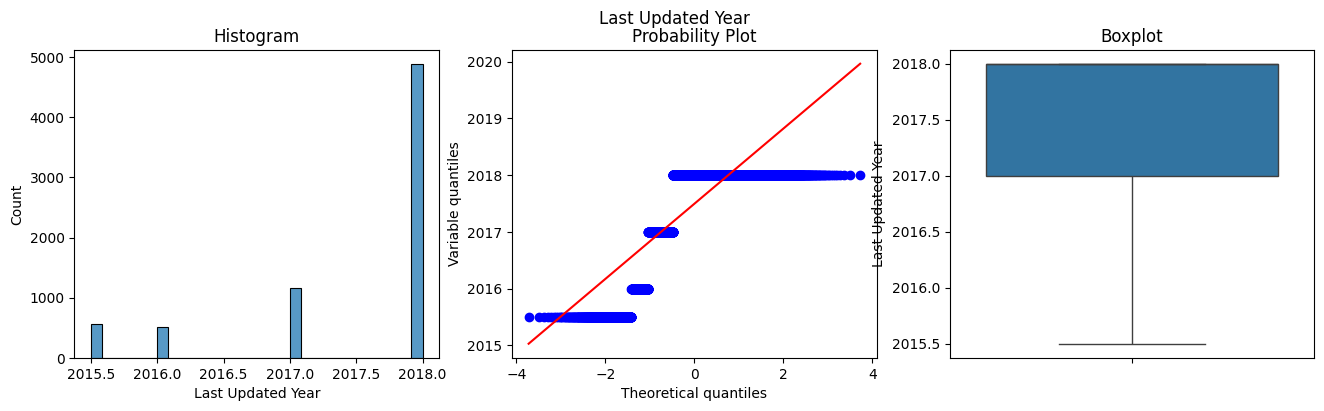

In [61]:
## we generally do not remove outliers from test set
for col in num:
    avg_l,avg_u=find_boundaries(xtrain,col)
    cap_outliers(xtrain,col,avg_l,avg_u)

    diagnostic_plots(xtrain,col)

In [62]:
## data seems sparse but how sparse?
print("Sparsity Percentage: ",(xtrain==0).sum().sum()/xtrain.size)

Sparsity Percentage:  0.6946270705667337


### Some questions to ponder upon now
* What model to use?
* What type of scaling should we use ?
* Should we perform PCA to bypass the sparsity problem?
* How can we experiment this without rerunning the code multiple times?

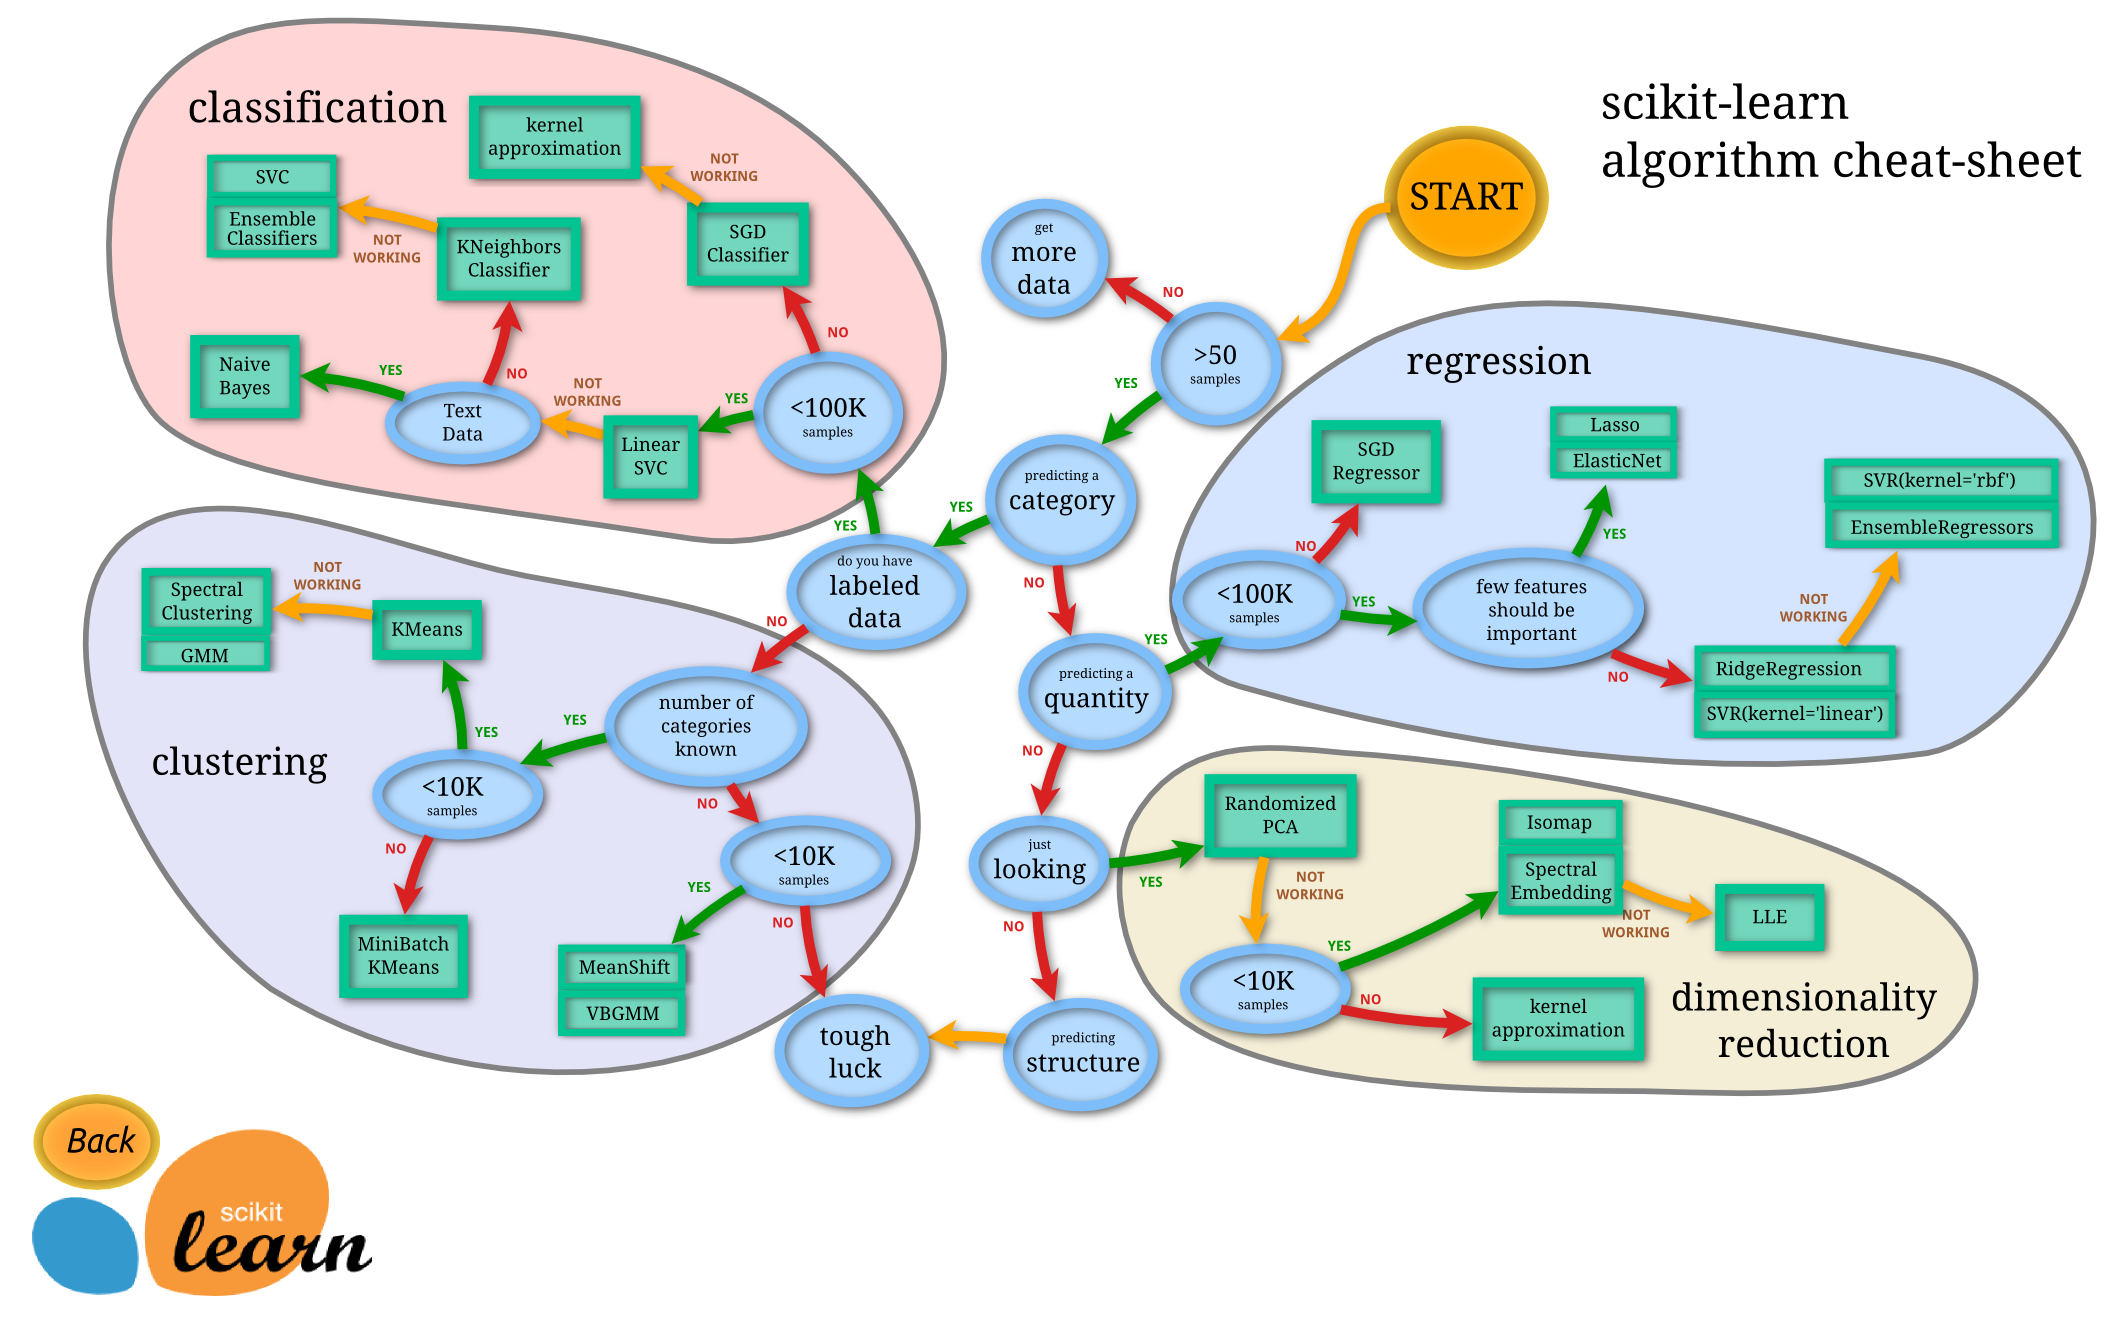

In our data we can try the following models:
* Lasso 
* ElasticNet 
* Ridge 
* SVR (with rbf kernel)
* Decision tree (not in chart but why not?)
* Xgboost (powerful model so why not------- محدش له عندي حاجة)

## 2. Setting Up The Experimentation Pipeline and Baseline Models 

In [63]:
def build_gridsearch(model):
    '''
    build a Gridsearch object on a pipeline with scaler and PCA and input model 
    
    Args:
    model : unfitted regressor 
    
    returns:
    gcv: sklearn gridsearch object on pipeline with scaler,PCA and inputted model
    '''
    pipeline=Pipeline(steps=[
        ("scaler",StandardScaler()),
        ("PCA",PCA(0.95)),
        ("model",model)##0.95 choosese n_components that preserve 95% of variance
    ])
    param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    "PCA":["passthrough",PCA(0.95)],
    "model":[model]}
    gcv=GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_absolute_error',verbose=0)
    
    return gcv 

def describe_preds(y_true,y_pred,model_name):
    
    '''
    visualise via histogram and describe distribution between predicted scores and true values 
    
    '''
    
    plt.hist(y_true,color="r",label="True Values",alpha=0.1)
    plt.hist(y_pred,color="b",label="Predictions",alpha=0.2);
    plt.title(model_name)
    plt.legend()
    plt.show()
    print(f"True Values {np.mean(y_true):.2f} +/- {np.std(y_true):.2f}")
    print(f"Predictions {np.mean(y_pred):.2f} +/- {np.std(y_pred):.2f}")

    

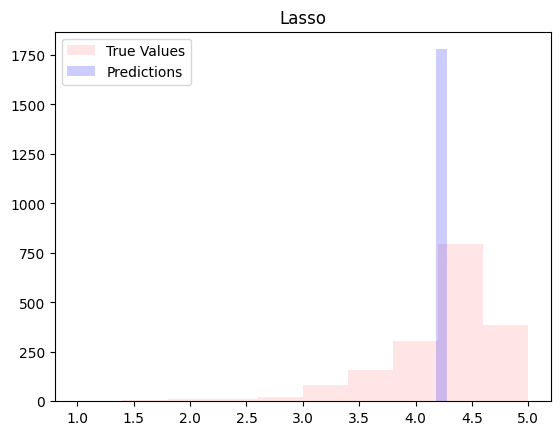

True Values 4.21 +/- 0.51
Predictions 4.18 +/- 0.00

 Lasso 
 MAE on train: 0.370
 MAE on validation: 0.364
(best params were: {'PCA': 'passthrough', 'model': Lasso(), 'scaler': StandardScaler()})


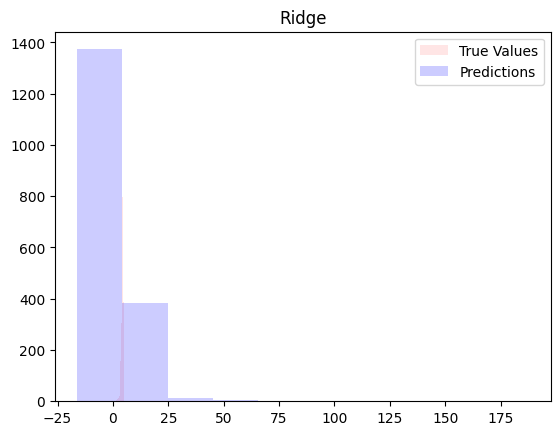

True Values 4.21 +/- 0.51
Predictions 5.45 +/- 10.02

 Ridge 
 MAE on train: 0.348
 MAE on validation: 1.734
(best params were: {'PCA': 'passthrough', 'model': Ridge(), 'scaler': MinMaxScaler()})


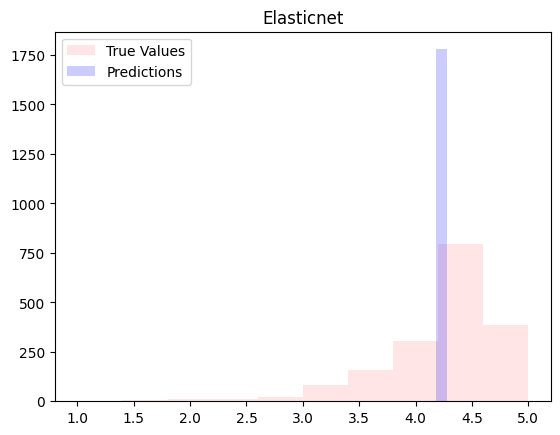

True Values 4.21 +/- 0.51
Predictions 4.18 +/- 0.00

 Elasticnet 
 MAE on train: 0.370
 MAE on validation: 0.364
(best params were: {'PCA': 'passthrough', 'model': ElasticNet(), 'scaler': StandardScaler()})


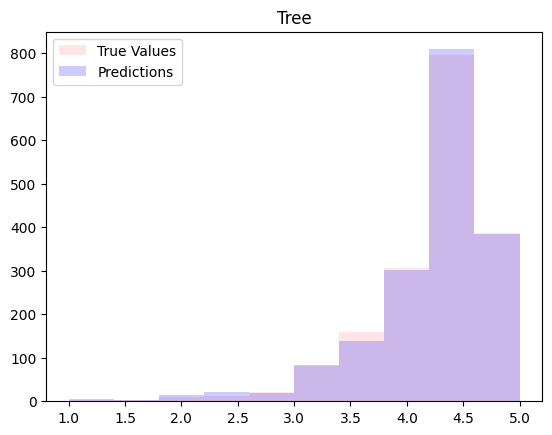

True Values 4.21 +/- 0.51
Predictions 4.21 +/- 0.55

 Tree 
 MAE on train: 0.015
 MAE on validation: 0.418
(best params were: {'PCA': 'passthrough', 'model': DecisionTreeRegressor(), 'scaler': StandardScaler()})


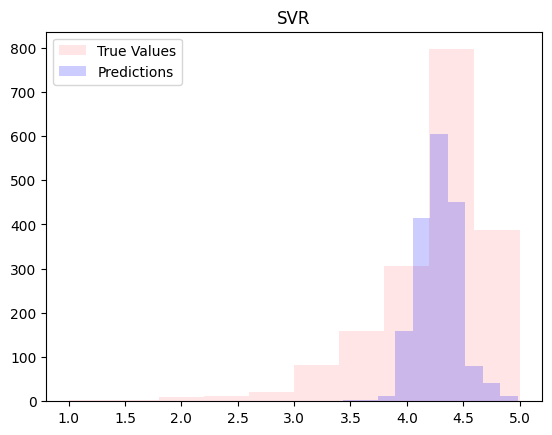

True Values 4.21 +/- 0.51
Predictions 4.28 +/- 0.18

 SVR 
 MAE on train: 0.326
 MAE on validation: 0.334
(best params were: {'PCA': 'passthrough', 'model': SVR(), 'scaler': MinMaxScaler()})


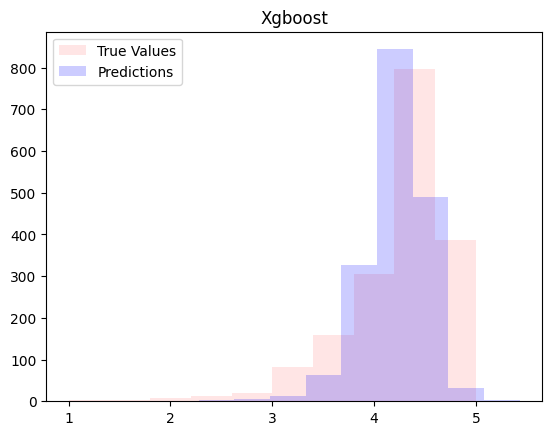

True Values 4.21 +/- 0.51
Predictions 4.20 +/- 0.30

 Xgboost 
 MAE on train: 0.203
 MAE on validation: 0.336
(best params were: {'PCA': 'passthrough', 'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...), 'scaler': MinMaxScaler()})


In [64]:
## trying out different models with different combinations with PCA and scaler let us see what model performs best 




models={"Lasso":Lasso(),"Ridge":Ridge(),"Elasticnet":ElasticNet(),
       "Tree":DecisionTreeRegressor(),"SVR":SVR(),"Xgboost":XGBRegressor()}

scores_train={}
scores_val={}
for name,model in models.items():
    gcv=build_gridsearch(model)
    gcv.fit(xtrain,ytrain)
    preds_train=gcv.predict(xtrain)
    preds_val=gcv.predict(xval)
    describe_preds(yval,preds_val,name)
    scores_train[name]=mean_absolute_error(ytrain,preds_train)
    scores_val[name]=mean_absolute_error(yval,preds_val)
    print("\n",name,"\n",f"MAE on train: {scores_train[name]:.3f}")
    print(f" MAE on validation: {scores_val[name]:.3f}")
    print(f"(best params were: {gcv.best_params_})")


    
    
    



*observations*:
* lasso and ridge are relatively poor 
* decision tree is highly overfitting 
* xgboost and SVR performed well 
* xgboost is slighly overfitting

you can continue to either optimise SVR or xgboost, I will do SVR , feel free to try xgboost, check hyperparamter tuning.ipynb to choose parameters to search over

## 3. Optimising Performance of Selected models

In [ ]:
## further tuning 

pipeline=Pipeline(steps=[
        ("scaler",StandardScaler()),
        ("PCA",PCA(0.95)),
        ("model",SVR())##0.95 choosese n_components that preserve 95% of variance
    ])
## feel free to search over pca and scaler again 
## but for the the sake of time let us search over only the SVR parameters
param_grid = {
    'scaler': [ MinMaxScaler()],
    "model__C":[0.001,0.01,1,10,100,1000]}
rcv=RandomizedSearchCV(pipeline, param_grid, n_iter=10,cv=3, scoring='neg_mean_absolute_error',verbose=100)

In [ ]:
%%timeit
rcv.fit(xtrain,ytrain)

## You have the code now experiment on your own a bit !!!


In [ ]:
## saving fitted pipeline 
joblib.dump(rcv, 'random_search_model.pkl')

Loading the pipeline for later 

```  
joblib.dump(rcv, 'random_search_model.pkl')
        
```